<a href="https://colab.research.google.com/github/asem3mustafa/Fake_News/blob/main/Fake%20News%20Detection%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#libraries of ML and NLP
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
import gensim
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

##Data Collection

reading data

In [ ]:
Fake = pd.read_csv("/content/drive/MyDrive/fakeNews.csv")
Real= pd.read_csv("/content/drive/MyDrive/trueNews.csv")
testing=pd.read_excel('/content/testing.xlsx')

In [ ]:
Real=Real[["Text","Label"]]
Fake=Fake[['Text','Binary Label']]
testing=testing[['text','label']]

rename the columns

In [ ]:
Fake.rename(columns={"Binary Label":"Label"},inplace=True)
testing.rename(columns={"text":"Text"},inplace=True)
testing.rename(columns={"label":"Label"},inplace=True)

In [ ]:
df1=pd.concat([Fake,Real],ignore_index=True)
df1
df=pd.concat([testing,df1],ignore_index=True)

size of data

In [ ]:
df.shape

(7861, 2)

sampling of data

In [ ]:
df.sample(5)

,Text,Label
5431,"""The overall goal is to be as transparent as p...",1.0
1774,A set of claims passed as instructions to be ...,0.0
5209,"""May this Easter give us added strength to suc...",1.0
4109,New diagnoses in several states pushed the tal...,1.0
2567,Indian's Ruling party BJP-run state Manipur i...,0.0


##EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    7861 non-null   object 
 1   Label   7860 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.0+ KB


In [ ]:
#sum of null values
df.isnull().sum()

Text     0
Label    1
dtype: int64

In [ ]:
#droping null value
df.dropna(inplace=True)

In [ ]:
#duplicated data
df.duplicated().sum()

334

In [ ]:
#droping duplicated
df.drop_duplicates(inplace=True)

In [ ]:
#remove URL from text
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

exam="covid19 is fatal disease :https://www.kaggle.com/c/nlp-getting-started"
print(remove_URL(exam))

covid19 is fatal disease :


In [ ]:
df["Text"]=df["Text"].apply(remove_URL)

In [ ]:
#remove Links
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

exam="""<div>
<h1>'Michigan governor violated social distancing order while signing stay-at-home order.\t\t'</h1>
<a href="https://www.kaggle.com/c/nlp-getting-started">enter</a>
</div>"""
print(remove_html(exam))


'Michigan governor violated social distancing order while signing stay-at-home order.		'
enter



In [ ]:
df["Text"]=df["Text"].apply(remove_html)

In [ ]:
#remove punctuation from text
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df["Text"]=df["Text"].apply(remove_punc)

In [ ]:
#lammatizer text
lemmatizer = WordNetLemmatizer()
stop_words=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
CustomStopWords=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y']

In [ ]:
#Clean Text
def clean_line(line):
    line =re.sub(r'[^a-zA-Z0-9]',' ',line)
    line=line.lower()
    line=gensim.utils.simple_preprocess(line, deacc=True)#return list #ignore tokens that are too short or too long
    #line=line.split()
    line=[lemmatizer.lemmatize(word,pos ="a") for word in line if word not in CustomStopWords]
    line=" ".join(line)
    return line

In [ ]:
df["Text"]=df["Text"].apply(clean_line)

In [ ]:
x=df["Text"]
y=df['Label']

## visulaization

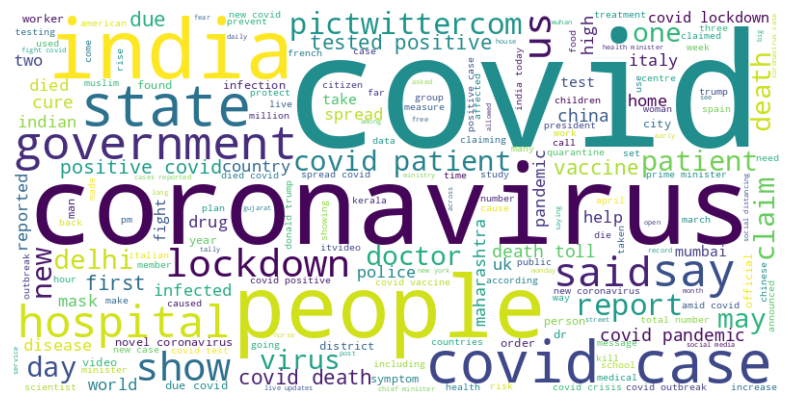

In [ ]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(df.Text))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## vectorization



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)
tf=TfidfTransformer()
X=tf.fit_transform(X)

X

<7526x13164 sparse matrix of type '<class 'numpy.float64'>'
	with 84378 stored elements in Compressed Sparse Row format>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5268, 13164), (2258, 13164), (5268,), (2258,))

RandomForestClassifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(n_estimators=30)

In [ ]:
RFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
y_pre1=RFC.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy of testing
score1=accuracy_score(y_test,y_pre1)
print(f'Accuracy of testing : {round(score1, 4)*100}%')

Accuracy of testing : 91.14%


In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
print("confusion_matrix of model  is : \n",confusion_matrix(y_test,y_pre1))

confusion_matrix of model  is : 
 [[ 968  130]
 [  70 1090]]


In [ ]:
print(classification_report(y_test,y_pre1))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      1098
         1.0       0.89      0.94      0.92      1160

    accuracy                           0.91      2258
   macro avg       0.91      0.91      0.91      2258
weighted avg       0.91      0.91      0.91      2258



LogisticRegression model

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(n_jobs=12)

In [ ]:
clf.fit(x_train, y_train)
y_pe2=clf.predict(x_test)

In [ ]:
score2=accuracy_score(y_test,y_pe2)
print(f'Accuracy of testing : {round(score2, 4)*100}%')

Accuracy of testing : 90.97%


MultinomialNBmodel

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB(alpha=.01)

In [ ]:

model1.fit(x_train,y_train)
y_pred4=model1.predict(x_test)

In [ ]:
score4=accuracy_score(y_test,y_pred4)
print(f'Accuracy of testing : {round(score4, 4)*100}%')

Accuracy of testing : 86.4%


In [ ]:
print("confusion_matrix of model  is : \n",confusion_matrix(y_test,y_pred4))

confusion_matrix of model  is : 
 [[ 917  181]
 [ 126 1034]]


In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1098
         1.0       0.85      0.89      0.87      1160

    accuracy                           0.86      2258
   macro avg       0.87      0.86      0.86      2258
weighted avg       0.86      0.86      0.86      2258



SVC model

In [ ]:
from sklearn.svm import SVC
dd=SVC(probability=True)
dd.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
oo=dd.predict(x_test)

score4=accuracy_score(y_test,oo)
print(f'Accuracy of testing : {round(score4, 4)*100}%')

Accuracy of testing : 91.67%


GradientBoostingClassifier model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
TF = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
sgd = TF.fit(x_train,y_train)

In [ ]:
y_pred = TF.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      1098
         1.0       0.86      0.94      0.90      1160

    accuracy                           0.89      2258
   macro avg       0.90      0.89      0.89      2258
weighted avg       0.90      0.89      0.89      2258



xgboost model

In [ ]:
import xgboost as xgb
DW=xgb.XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=80,)

In [ ]:
DW.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
ypre=DW.predict(x_test)

In [ ]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      1098
         1.0       0.86      0.97      0.91      1160

    accuracy                           0.90      2258
   macro avg       0.91      0.90      0.90      2258
weighted avg       0.91      0.90      0.90      2258



##test ML

In [ ]:
#outo correct input words
!pip install deep_translator
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=755cd663a01ed7dfd5c476d1816f2a230e4d0f722c4b23ec32b05aedf8778fce
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
#translate the input words
from deep_translator import GoogleTranslator
def Trans(text):
  SD=GoogleTranslator(source='ar',target='en').translate(text)
  return SD

In [ ]:
#input the covid 19 news
from autocorrect import Speller
spell=Speller(lang='en')
inpu=input('enter your text : ')
print('the original phase is : ',spell(inpu))
text=Trans(spell(inpu))
print('translate is :',text)

enter your text : كوفيدا 19 يوثر علي المخ و الجهاز العصبي للجسم 
the original phase is :  كوفيدا 19 يوثر علي المخ و الجهاز العصبي للجسم 
translate is : Covid 19 affects the brain and nervous system of the body


Normalization Text

In [ ]:
text=remove_URL(text)
text=remove_html(text)
text=remove_punc(text)
text=clean_line(text)

In [ ]:
text

'covid affects brain nervous system body'

vectorization of text

In [ ]:
fgf=vectorizer.transform([text])

In [ ]:
DF=tf.transform(fgf)

prediction of news

In [ ]:
# for i in Text:
result1=clf.predict_proba(DF)
print("the news is fake :",round(result1[0][0],3)*100)
print("the news is real :",round(result1[0][1],3)*100)
# score2=accuracy_score(result1,test['Label'])
# print(f'Accuracy of testing : {round(score2, 4)*100}%')

the news is fake : 31.7
the news is real : 68.30000000000001


In [ ]:
KK=model1.predict_proba(DF)
print("the news is fake :",round(KK[0][0],3)*100)
print("the news is real :",round(KK[0][1],3)*100)

# score2=accuracy_score(KK,test['Label'])
# print(f'Accuracy of testing : {round(score2, 4)*100}%')

the news is fake : 24.9
the news is real : 75.1


In [ ]:
YH=RFC.predict_proba(DF)
print("the news is fake :",round(YH[0][0],3)*100)
print("the news is real :",round(YH[0][1],3)*100)

# score2=accuracy_score(YH,test['Label'])
# print(f'Accuracy of testing : {round(score2, 4)*100}%')

the news is fake : 50.0
the news is real : 50.0


In [ ]:
FF=dd.predict_proba(DF)
print("the news is fake :",round(FF[0][0],3)*100)
print("the news is real :",round(FF[0][1],3)*100)
# score2=accuracy_score(FF,test['Label'])
# print(f'Accuracy of testing : {round(score2, 4)*100}%')

the news is fake : 16.5
the news is real : 83.5


In [ ]:
SA=sgd.predict_proba(DF)
print("the news is fake :",round(SA[0][0],3)*100)
print("the news is real :",round(SA[0][1],3)*100)

the news is fake : 11.700000000000001
the news is real : 88.3


In [ ]:
ZS=DW.predict_proba(DF)
print("the news is fake :",round(ZS[0][0],3)*100)
print("the news is real :",round(ZS[0][1],3)*100)

the news is fake : 17.70000010728836
the news is real : 82.30000138282776


normalization of results

In [ ]:
total_Fake=(SA[0][0]+FF[0][0]+YH[0][0]+KK[0][0]+result1[0][0]+ZS[0][0])/6
total_real=(SA[0][1]+FF[0][1]+YH[0][1]+KK[0][1]+result1[0][1]+ZS[0][1])/6

##result Test


In [ ]:
print(f'Accuracy of FAKE : {round(total_Fake, 3)*100}%')
print(f'Accuracy of REAL : {round(total_real, 3)*100}%')

Accuracy of FAKE : 25.4%
Accuracy of REAL : 74.6%
